##**Kalbe Machine Learning Project**

##Import Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings('ignore')

Baca Data

In [59]:
!gdown --fuzzy https://drive.google.com/file/d/1CC4x56VToictkVWmFESe2_DU3dTsHUkS/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/19ipVAKd0v5AuRbLo602f2iLHDeSeQ1OW/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1MPrLZpY6Xl6lO6kgsIRykM25EvajvAeR/view?usp=sharing
!gdown --fuzzy https://drive.google.com/file/d/1J7Qmjpc1W0nbKNOEX68foxLlzswFWVU4/view?usp=sharing
cust =pd.read_csv("Case Study - Customer.csv", delimiter=';')
product =pd.read_csv("Case Study - Product.csv",delimiter=';')
store =pd.read_csv("Case Study - Store.csv",delimiter=';')
transc =pd.read_csv("Case Study - Transaction.csv", delimiter=';')

Downloading...
From: https://drive.google.com/uc?id=1CC4x56VToictkVWmFESe2_DU3dTsHUkS
To: /content/Case Study - Customer.csv
100% 10.1k/10.1k [00:00<00:00, 25.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=19ipVAKd0v5AuRbLo602f2iLHDeSeQ1OW
To: /content/Case Study - Product.csv
100% 225/225 [00:00<00:00, 859kB/s]
Downloading...
From: https://drive.google.com/uc?id=1MPrLZpY6Xl6lO6kgsIRykM25EvajvAeR
To: /content/Case Study - Store.csv
100% 832/832 [00:00<00:00, 2.75MB/s]
Downloading...
From: https://drive.google.com/uc?id=1J7Qmjpc1W0nbKNOEX68foxLlzswFWVU4
To: /content/Case Study - Transaction.csv
100% 213k/213k [00:00<00:00, 97.9MB/s]


In [60]:
cust.shape, product.shape, store.shape, transc.shape #melihat jumlah baris dan kolom

((447, 5), (10, 3), (14, 6), (5020, 8))

##Data Cleansing

In [61]:
cust.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [62]:
cust.duplicated().sum() #tidak ada duplicated value

0

In [63]:
cust.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [65]:
cust = cust.dropna()
cust.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [66]:
cust.shape

(444, 5)

In [9]:
product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [10]:
product.duplicated().sum()

0

In [11]:
product.isna().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [12]:
store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [13]:
store.duplicated().sum()

0

In [14]:
store.isna().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [15]:
transc.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [16]:
#data cleansing customer
cust['Income'] = cust['Income'].replace('[,]','.',regex = True).astype('float')

In [17]:
#data cleansing store
store['Latitude'] = store['Latitude'].replace('[,]','.',regex = True).astype('float')
store['Longitude'] = store['Longitude'].replace('[,]','.',regex = True).astype('float')

In [18]:
#data cleansing transaction
transc['Date'] = pd.to_datetime(transc['Date'])
transc = transc.groupby('TransactionID').apply(lambda x: x.loc[x['Date'].idxmax()]) #membuat group berdasarkan transaction id dan mmeilih yang terbaru
transc.reset_index(drop = True, inplace = True) #memastikan index lama sudah dihapus

In [19]:
transc['TransactionID'].value_counts()

TR10008    1
TR70439    1
TR70505    1
TR70497    1
TR7049     1
          ..
TR39680    1
TR39671    1
TR39596    1
TR39584    1
TR99925    1
Name: TransactionID, Length: 4908, dtype: int64

In [20]:
transc[ transc['TransactionID'] == 'TR71313']

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
3309,TR71313,370,2022-09-26,P3,7500,2,15000,3


In [21]:
transc.duplicated().sum()

0

In [22]:
transc.isna().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

##Penggabungan Data

In [23]:
df_merge = pd.merge(transc, cust, on=['CustomerID'])
df_merge = pd.merge(df_merge, product.drop(columns=['Price']), on=['ProductID'])
df_merge = pd.merge(df_merge, store, on=['StoreID'])

In [24]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR10008,235,2022-05-21,P8,16000,2,32000,4,37,0,Married,5.35,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
1,TR39070,350,2022-06-23,P8,16000,2,32000,4,38,0,Single,7.95,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
2,TR8584,293,2022-09-14,P8,16000,3,48000,4,54,0,Married,10.40,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR69229,46,2022-05-07,P8,16000,2,32000,4,36,1,Married,8.31,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR88920,447,2022-01-16,P8,16000,1,16000,4,54,1,Married,20.37,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [25]:
df_merge.to_csv('Case Study-Compile.csv', index=False)

##**Model Machine Learning Regresi**

In [27]:
df_regresi = df_merge.groupby(['Date']).agg({
  'Qty': 'sum'
}).reset_index() #membuat dataframe baru untuk regresi

In [28]:
df_regresi #ada 365 row karena data harian, time series biasa hanya 2 kolom

,Date,Qty
0,2022-01-01,47
1,2022-01-02,45
2,2022-01-03,67
3,2022-01-04,98
4,2022-01-05,57
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,40


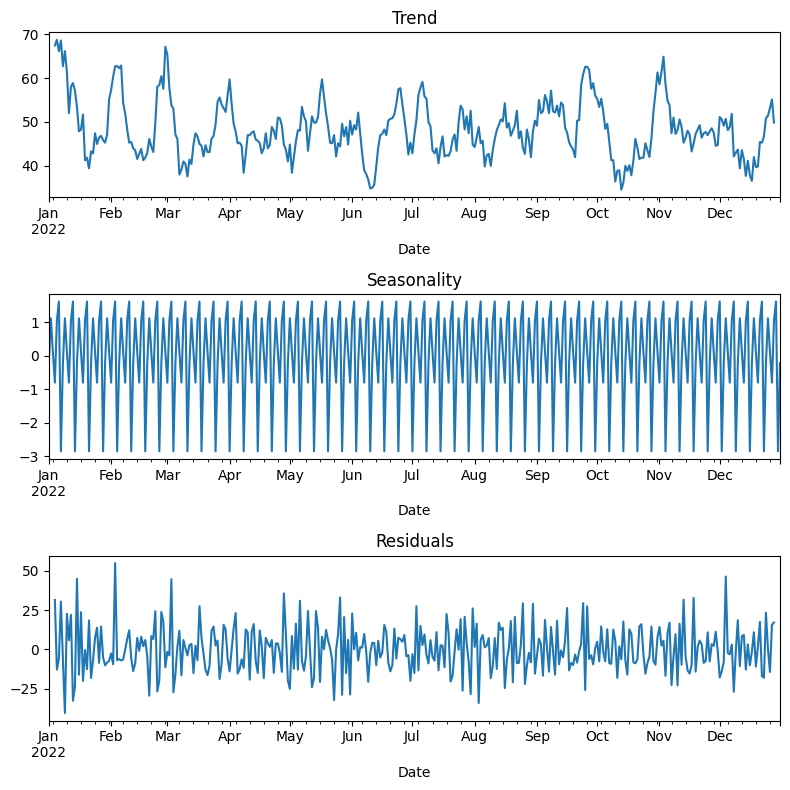

In [29]:
decomposed = seasonal_decompose(df_regresi.set_index('Date')) #decompose data time series jadi tren, seasonal, resid
plt.figure(figsize=(8,8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend') #memplot komponen tren
#tren cenderung tidak terllau beraturan namun menurun di tengah bulan dan naik tiap di awal dan akhir bulan
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
#memiliki pattern seasonality
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

##Check stationarity data

Menggunakan augmented dickey fuller test

In [30]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_regresi['Qty'])
print('ADF Statistic: %f' % result[1])
print('Critical Values: ')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key,value))

#adf statistic < critical value --> tolak H0, data time series stasioner -> tidak memiliki tren/ seasonality signifikan, cocok untuk forecasting

ADF Statistic: 0.000000
Critical Values: 
	1%: -3.448
	5%: -2.870
	10%: -2.571


In [31]:
cut_off = round(df_regresi.shape[0]*0.8)
df_train = df_regresi[:cut_off]
df_test = df_regresi[cut_off:].reset_index(drop=True)
df_train.shape, df_test.shape

((292, 2), (73, 2))

In [32]:
df_train #untuk time series data harus berurutan tanggalnya

,Date,Qty
0,2022-01-01,47
1,2022-01-02,45
2,2022-01-03,67
3,2022-01-04,98
4,2022-01-05,57
...,...,...
287,2022-10-15,33
288,2022-10-16,24
289,2022-10-17,53
290,2022-10-18,47


In [33]:
df_test

,Date,Qty
0,2022-10-20,39
1,2022-10-21,35
2,2022-10-22,56
3,2022-10-23,59
4,2022-10-24,39
...,...,...
68,2022-12-27,70
69,2022-12-28,68
70,2022-12-29,42
71,2022-12-30,40


<Axes: xlabel='Date', ylabel='Qty'>

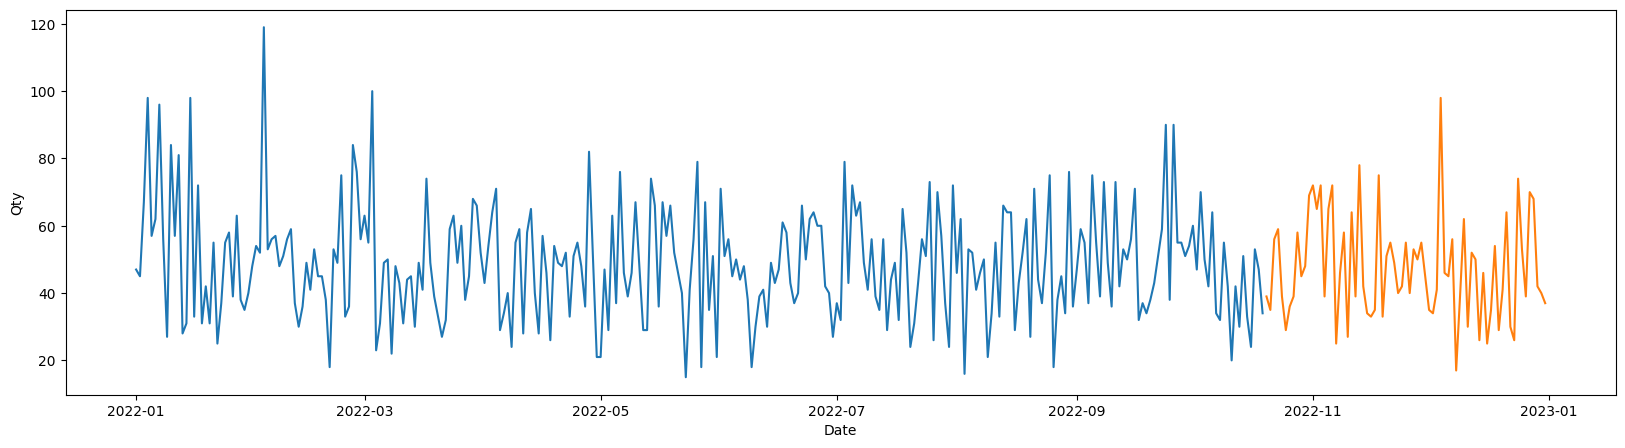

In [34]:
plt.figure(figsize = (20,5))
sns.lineplot(data = df_train, x = df_train['Date'], y = df_train['Qty'])
sns.lineplot(data=df_test, x=df_test['Date'], y = df_test['Qty'])
#tidak ada tren naik, hanya menunjukkan seasonality

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

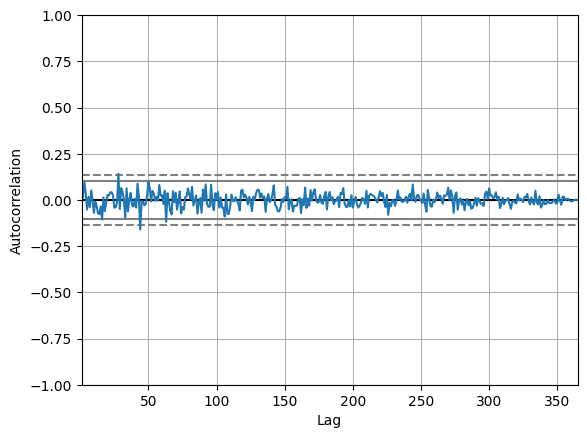

In [35]:
autocorrelation_plot(df_regresi['Qty'])
#digunakan untuk mencari p,d, dan q untuk ARIMA

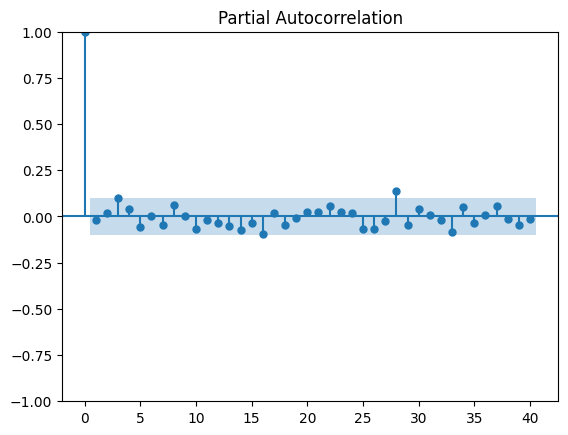

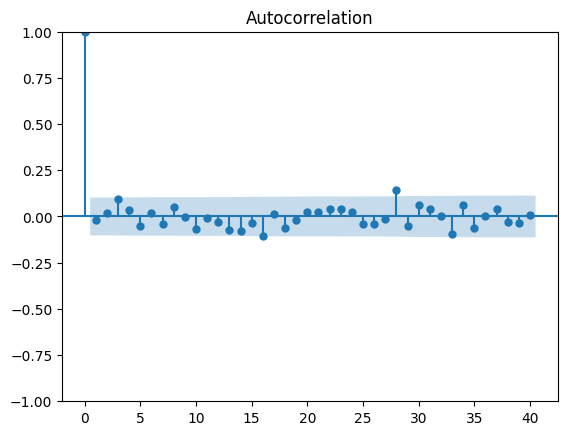

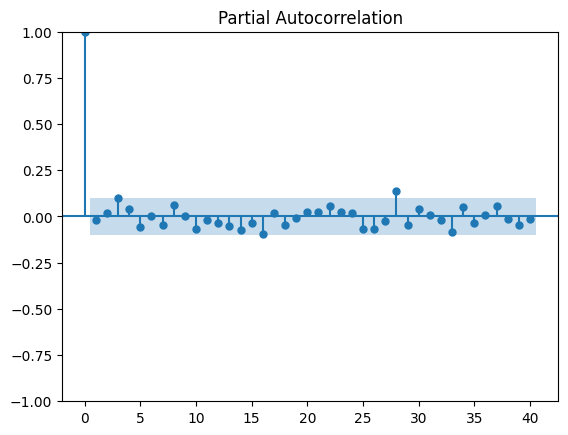

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_regresi['Qty'], lags=40)
plot_pacf(df_regresi['Qty'], lags=40)

In [37]:
import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

p_values = range(0, 50)
d_values = range(0, 50)
q_values = range(0, 50)

best_aic = np.inf
best_order = None

for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(df_regresi, order=(p, d, q))
        model_fit = model.fit()
        aic = model_fit.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (p, d, q)
    except:
        continue

print(f"Best AIC: {best_aic}")
print(f"Best (p, d, q) order: {best_order}")

Best AIC: inf
Best (p, d, q) order: None


In [38]:
def rmse(y_actual, y_pred):
    """
    function to calculate RMSE
    """

    print(f'RMSE value {mean_squared_error(y_actual, y_pred)**0.5}')

def eval(y_actual, y_pred):
    """
    functional to eval machine learning modelling
    """

    rmse(y_actual, y_pred)
    print(f'MAE value {mean_absolute_error(y_actual, y_pred)}')

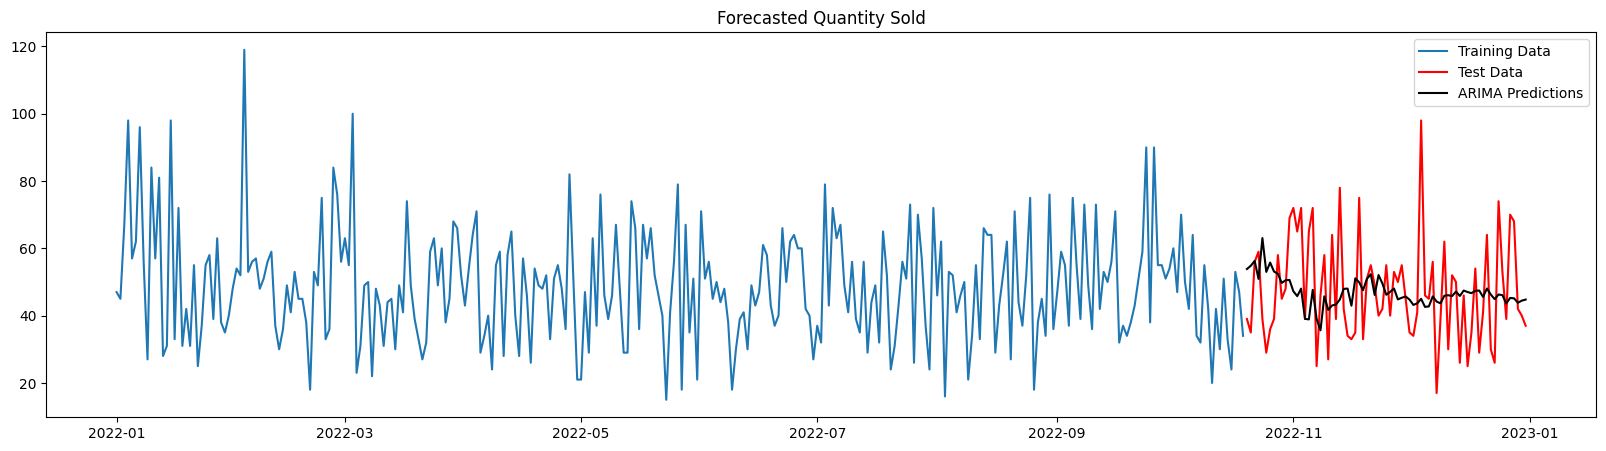

In [39]:
#ARIMA
df_train = df_train.set_index('Date')
df_test = df_test.set_index('Date')

y = df_train['Qty']

ARIMAModel = ARIMA(y, order=(40, 2, 1))
ARIMAModel = ARIMAModel.fit()

y_pred = ARIMAModel.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = ARIMAModel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])
y_pred_df = y_pred_df.loc[df_test.index]
y_pred_out = y_pred_df['predictions']

plt.figure(figsize=(20, 5))
plt.plot(df_train['Qty'], label='Training Data')
plt.plot(df_test['Qty'], color='red', label='Test Data')
plt.plot(y_pred_out, color='black', label='ARIMA Predictions')
plt.title('Forecasted Quantity Sold')
plt.legend()
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_forecast(pred, aktual):

    mse = mean_squared_error(aktual, pred)
    mae = mean_absolute_error(aktual, pred)
    return mse, mae

mse, mae = evaluate_forecast(y_pred_out, df_test['Qty'])

# Print the results
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 254.84460089186732
Mean Absolute Error: 12.766590563333537


In [41]:
mean = y_pred_df.mean().round()
print(mean)

lower Qty      13.0
upper Qty      80.0
predictions    47.0
dtype: float64


##**Clustering**

In [42]:
df_merge.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR10008,235,2022-05-21,P8,16000,2,32000,4,37,0,Married,5.35,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
1,TR39070,350,2022-06-23,P8,16000,2,32000,4,38,0,Single,7.95,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
2,TR8584,293,2022-09-14,P8,16000,3,48000,4,54,0,Married,10.40,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
3,TR69229,46,2022-05-07,P8,16000,2,32000,4,36,1,Married,8.31,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664
4,TR88920,447,2022-01-16,P8,16000,1,16000,4,54,1,Married,20.37,Oat,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [43]:
#identifikasi kolom yang redundant/memiliki korelasi tinggi
df_merge.corr()

,CustomerID,Price,Qty,TotalAmount,StoreID,Age,Gender,Income,Latitude,Longitude
CustomerID,1.000000,-0.016848,-0.013039,-0.027297,0.008386,-0.022445,-0.018030,0.004778,0.006296,-0.006894
Price,-0.016848,1.000000,-0.353870,0.440091,-0.031161,0.014174,0.011297,0.001985,-0.026628,0.018088
Qty,-0.013039,-0.353870,1.000000,0.621611,0.011983,-0.026400,-0.010760,-0.032228,-0.008123,0.006392
TotalAmount,-0.027297,0.440091,0.621611,1.000000,-0.012294,-0.015377,-0.009347,-0.027208,-0.031321,0.026888
StoreID,0.008386,-0.031161,0.011983,-0.012294,1.000000,-0.007778,-0.002103,0.003226,0.469529,-0.096025
Age,-0.022445,0.014174,-0.026400,-0.015377,-0.007778,1.000000,-0.026988,0.485602,0.007204,0.020950
Gender,-0.018030,0.011297,-0.010760,-0.009347,-0.002103,-0.026988,1.000000,-0.066849,-0.010182,-0.000047
Income,0.004778,0.001985,-0.032228,-0.027208,0.003226,0.485602,-0.066849,1.000000,0.019291,0.002871
Latitude,0.006296,-0.026628,-0.008123,-0.031321,0.469529,0.007204,-0.010182,0.019291,1.000000,-0.393545
Longitude,-0.006894,0.018088,0.006392,0.026888,-0.096025,0.020950,-0.000047,0.002871,-0.393545,1.000000


In [44]:
df_cluster = df_merge.groupby(['CustomerID']).agg({
    'TransactionID' : 'count',
    'Qty' : 'sum',
    'TotalAmount' : 'sum'
}).reset_index()
df_cluster.head()

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,12,56,382300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600


In [45]:
data_cluster = df_cluster.drop(columns=['CustomerID'])

data_cluster_normalize = preprocessing.normalize(data_cluster)
data_cluster_normalize

array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.13889612e-05, 1.46481819e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.20271286e-05, 1.16804822e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.98656046e-05, 9.20856143e-05, 9.99999995e-01]])

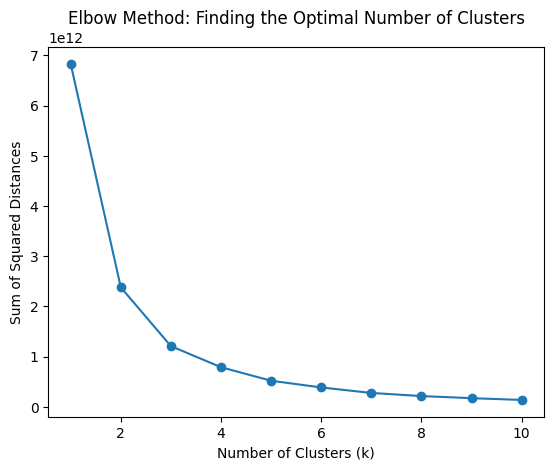

In [46]:
sum_squared_distances = []

for num_clusters in range(1, 11):
    # Membuat model K-Means dengan jumlah kluster saat ini
    kmeans_model = KMeans(n_clusters=num_clusters)
    # Melatih model K-Means dengan data dalam df_cluster
    kmeans_model.fit(df_cluster)
    # Menghitung jumlah jarak kuadrat untuk model ini
    sum_squared_distance = kmeans_model.inertia_
    sum_squared_distances.append(sum_squared_distance)

# Plot jumlah jarak kuadrat terhadap jumlah kluster
plt.plot(range(1, 11), sum_squared_distances, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method: Finding the Optimal Number of Clusters')
plt.show()

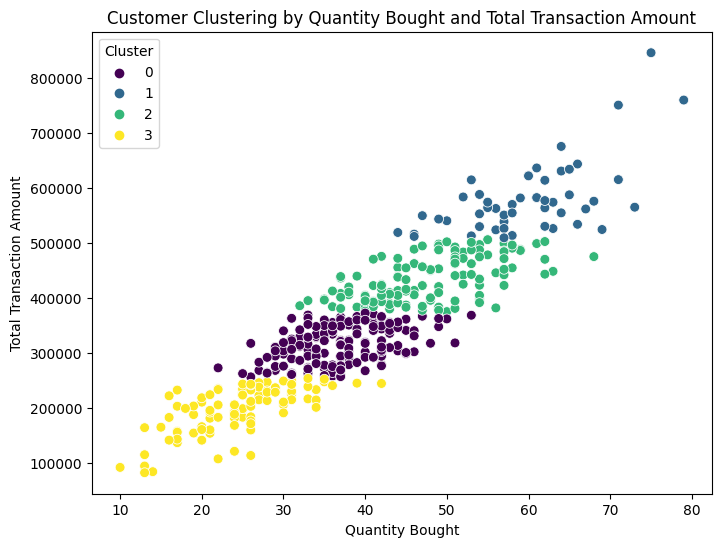

In [49]:
# menentukan jumlah clustin
n_clusters = 4

# membuat model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_assignments = kmeans.fit_predict(df_cluster)

# Membuat scatterplot berdasarkan cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cluster['Qty'], y=df_cluster['TotalAmount'], s=50, hue=cluster_assignments, palette='viridis')
plt.xlabel('Quantity Bought')
plt.ylabel('Total Transaction Amount')
plt.title('Customer Clustering by Quantity Bought and Total Transaction Amount')
plt.legend(title='Cluster')
plt.show()

In [52]:
df_cluster['cluster_label'] = cluster_assignments

# Mengelompokkan berdasarkan label klaster dan lakukan agregasi
cluster_summary = df_cluster.groupby(['cluster_label']).agg({
    'CustomerID': 'count',
    'TransactionID': 'mean',
    'Qty': 'mean',
    'TotalAmount': 'mean'
})

# Menampilkan statistik ringkasan untuk setiap klaster.
print(cluster_summary)

               CustomerID  TransactionID        Qty    TotalAmount
cluster_label                                                     
0                     170      10.247059  36.688235  312779.411765
1                      50      15.800000  59.780000  581038.000000
2                     128      12.875000  47.726562  434225.781250
3                      96       7.125000  24.489583  197461.458333


**Cluster 0** : Total quantity pembelian cenderung cukup rendah dengan total transaction amount yang juga cukup rendah.

**Cluster 1**: Pembeli loyal dengan kuantitas dan juga total amount yang tinggi.

**Cluster 2** : Pembeli dengan total kuantitas dan jumlah transaksi cenderung lumayan tinggi.

**Cluster 3** : Pembeli dengan total kuantitas dan jumlah transaksi terendah.